In [29]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import math
import scipy.special as sc
import pickle

In [30]:
sns.set() 

In [31]:
c = 50

In [32]:
data = pickle.load(open("./Jakubik.p", "rb"))
data

[[50.0,
  50.5,
  51.0,
  51.5,
  52.0,
  52.5,
  53.0,
  53.5,
  54.0,
  54.5,
  55.0,
  55.5,
  56.0,
  56.5,
  57.0,
  57.5,
  58.0,
  58.5,
  59.0,
  59.5,
  60.0,
  60.5,
  61.0,
  61.5,
  62.0,
  62.5,
  63.0,
  63.5,
  64.0,
  64.5,
  65.0,
  65.5,
  66.0,
  66.5,
  67.0,
  67.5,
  68.0,
  68.5,
  69.0,
  69.5,
  70.0,
  70.5,
  71.0,
  71.5,
  72.0,
  72.5,
  73.0,
  73.5,
  74.0,
  74.5,
  75.0,
  75.5,
  76.0,
  76.5,
  77.0,
  77.5,
  78.0,
  78.5,
  79.0,
  79.5,
  80.0,
  80.5,
  81.0,
  81.5,
  82.0,
  82.5,
  83.0,
  83.5,
  84.0,
  84.5,
  85.0,
  85.5,
  86.0,
  86.5,
  87.0,
  87.5,
  88.0,
  88.5,
  89.0,
  89.5,
  90.0,
  90.5,
  91.0,
  91.5,
  92.0,
  92.5,
  93.0,
  93.5,
  94.0,
  94.5,
  95.0,
  95.5,
  96.0,
  96.5,
  97.0,
  97.5,
  98.0,
  98.5,
  99.0,
  99.5,
  100.0,
  100.5,
  101.0,
  101.5,
  102.0,
  102.5,
  103.0,
  103.5,
  104.0,
  104.5,
  105.0,
  105.5,
  106.0,
  106.5,
  107.0,
  107.5,
  108.0,
  108.4326855022052,
  108.9326855022052,
  109

In [33]:
#dla każdej z trajektorii spadki pochodzą z tego samego rozkładu, więc wyłapuję wszystkie spadki jakie tylko pojawiły się 
#podczas generowania 50 trajektorii
def falls(data,c = 50):
    falls=[]
    c_list = []
    for i in range (len(data)):
        for j in range (len(data[i])-1):
            
            #if data[i][j+1] != data[i][j] + c*0.01:
            if (round(data[i][j+1],2) != round(data[i][j] + c*0.01,2)):
                fall = round(data[i][j] + c*0.01,2)-round(data[i][j+1],2)
                falls.append(fall)
            else:
                c_ = round(data[i][j+1]-data[i][j],2)/0.01
                c_list.append(c_)

    #falls_array = np.array(falls)
    #falls_absolute = np.absolute(falls_array)
                
    return (falls,c_list)

In [34]:
falls_and_c = falls(data)

In [35]:
c_values = falls_and_c[1]

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

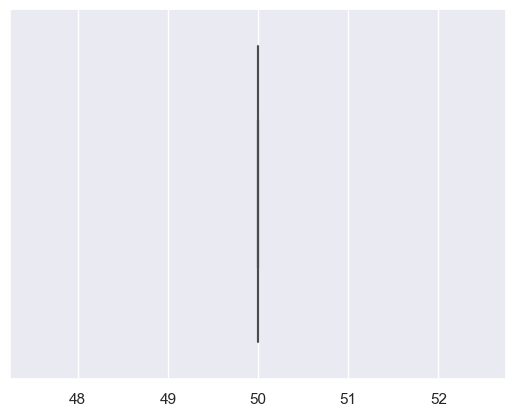

In [36]:
sns.boxplot(c_values)

In [37]:
c = np.mean(c_values)
c

50.0

In [38]:
X_i = falls_and_c[0]
len(X_i)

12280

In [39]:
negative = [element <0 for element in X_i]
negative.count(True)

0

In [40]:
EX_i = np.mean(X_i)
EX_i

10.314160423452769

In [41]:
def density_exp(x_axis,intens):
    y_axis = scipy.stats.expon.pdf(x_axis,0, intens)
    return y_axis

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Density'>

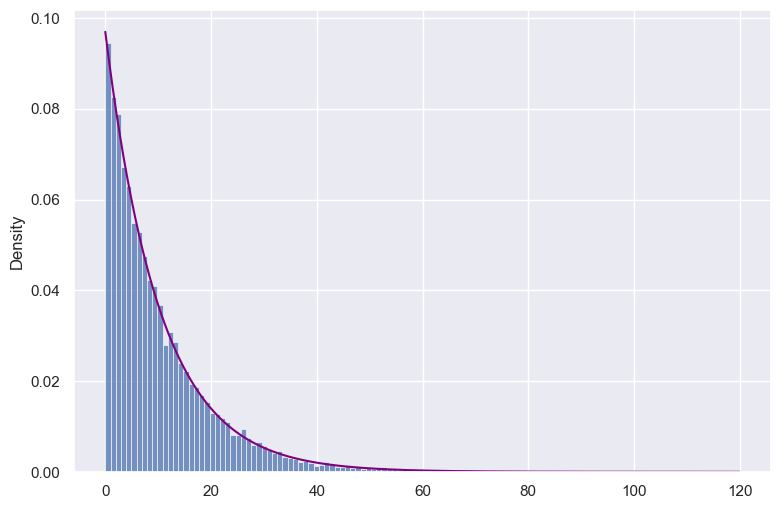

In [42]:
#narysujmy histogram spadków i dopasujmy do tego gęstosć (najprawdopodpbniej z rozkładu wykładniczego)
plt.figure(figsize=(9,6))
sns.histplot(X_i, kde=False, stat="density")

x_axis = np.arange(0,120,0.1) 
sns.lineplot(x_axis,density_exp(x_axis,EX_i), color = "purple")

In [43]:
def cdf_exp(x_axis,intens):
    y_axis = scipy.stats.expon.cdf(x_axis,scale=intens)
    return y_axis

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

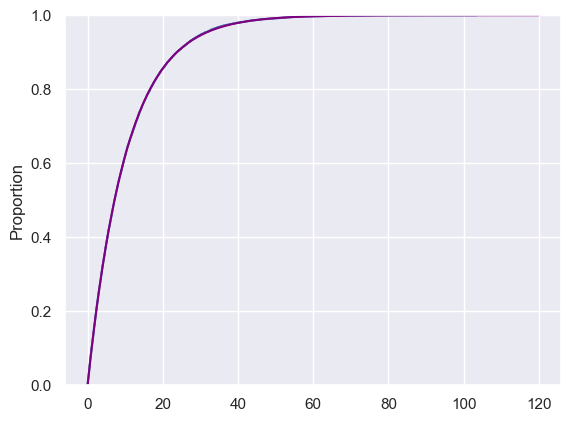

In [44]:
# no to sprawdźmy sobie jeszcze dystrybuantę empiryczną
sns.ecdfplot(X_i)
sns.lineplot(x_axis,cdf_exp(x_axis,EX_i), color = "purple")

C:\Users\wypyc\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


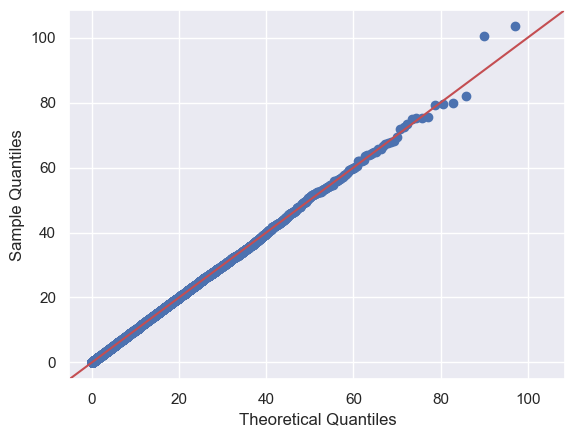

In [45]:
sm.qqplot(np.array(X_i), line ='45',dist = scipy.stats.expon(scale=EX_i),color = "purple");

In [46]:
# Wniosek: spadki mają rozkład wykładniczy z parametrem = 1/10.3 (notacja niepythonowa) Czyli EX_i = 10/3

In [47]:
#teraz znajdziemy momenty pojawienia się spadków, czyli momenty skoków JPP a następnie wyciągniemy z tego czasy oczekiwania
#na kolejny skok, żeby wiedzieć, jaki rozkład mają, a co za tym idzie jaki jest parametr lambda JPP
def moments(data):
    all_times = []
    for i in range (len(data)):
        moments=[]
        for j in range (len(data[i])-1):
            if (round(data[i][j+1],2) != round(data[i][j] + c*0.01,2)):
                moment=(j+1)/100
                moments.append(moment) #momenty skoków w pojedynczej trajektorii
        times = np.diff(moments) #czasy między skokami w pojedynczej trajektorii
        times_as_list = list(times) #żeby się dopisywały kolejne elementy do listy, a nie dodawały między sobą na odpowia
                                    #dających sobie indeksach
        all_times += times_as_list  #lista czasów między skokami dla wszystkich tajektorii
    return all_times

In [48]:
step_times = moments(data)

In [49]:
lam = np.mean(step_times)#średnia czasów oczekiwania na skok, czyli skoki są z Exp(1/lam) więc intensywność JPP to (1/lam)
lam

0.4056385936222404

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Density'>

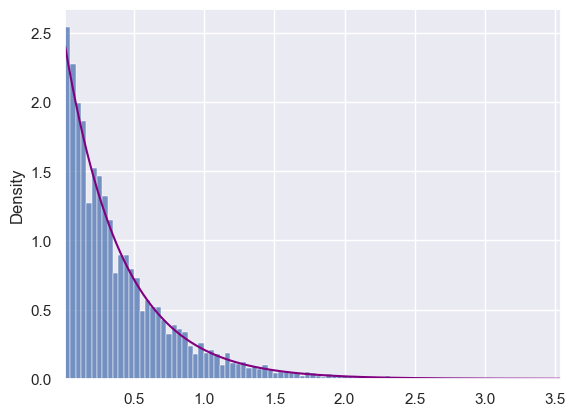

In [50]:
sns.histplot(step_times, stat = "density")
plt.xlim(np.min(step_times),np.max(step_times))

x_axis2 = np.arange(np.min(step_times),np.max(step_times),0.0001)
sns.lineplot(x_axis2,density_exp(x_axis2,lam), color = "purple")

C:\Users\wypyc\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


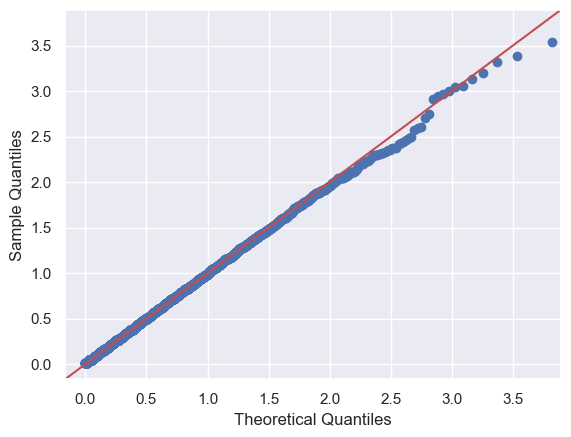

In [51]:
sm.qqplot(np.array(step_times), line ='45',dist = scipy.stats.expon(scale=lam),color = "purple");

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

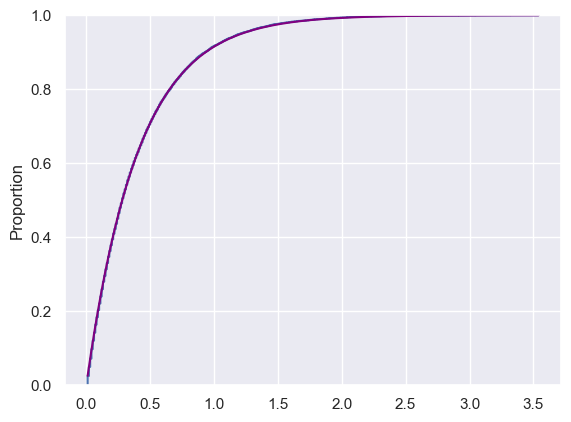

In [52]:
sns.ecdfplot(step_times)
sns.lineplot(x_axis2,cdf_exp(x_axis2,lam), color = "purple")

In [53]:
#Wniosek czasy pochodzą z Exp 
#E[times]=0.41
#times są z Exp(1/0.43) (notacja niepythonowa)
# zatem lambda w Poissonie to 1/0.41

In [54]:
lam_p = 1/lam #intensywność poissona
lam_p

2.4652486615493774

In [55]:
theta = c/(EX_i*lam_p)-1

In [56]:
theta

0.9664159610116323

In [57]:
#generowanie JPP
def JPP(lam):
    I = 0
    t=0
    T = 100
    times = []
    while t <= T:
        U=scipy.stats.uniform.rvs()
        t = t - 1/lam*np.log(U)
        times.append(t)
    #times_cum=np.cumsum(times)
    return times 

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

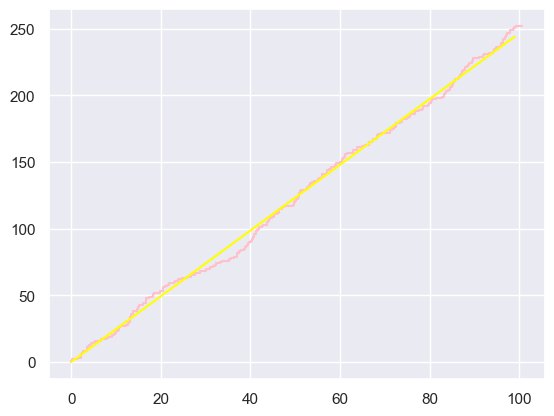

In [58]:
#narysowanie trajektorii JPP
poiss = JPP(2.5) 
numbers = list(range(0,len(poiss)))
sns.lineplot(poiss,numbers,color = "pink", drawstyle='steps-pre')

#plt.lineplot(np.arange(0,100,1), 1/0.4)

x = np.arange(0,100)
#y = x*2.5
y = x*lam_p
sns.lineplot(x,y, color = "yellow")

In [59]:
# wyciągam z otrzymanych danych trajektorie Poissona
def moments_of_climb(data=data):
    all_times = []
    for i in range (len(data)):
        moments=[]
        for j in range (len(data[i])-1):
            if (round(data[i][j+1],2) != round(data[i][j] + c*0.01,2)):
                moment=(j+1)/100
                moments.append(moment) #momenty skoków w pojedynczej trajektorii
        
        all_times.append(moments)  #lista momentów skoków dla wszystkich tajektorii
    return all_times

C:\Users\wypyc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

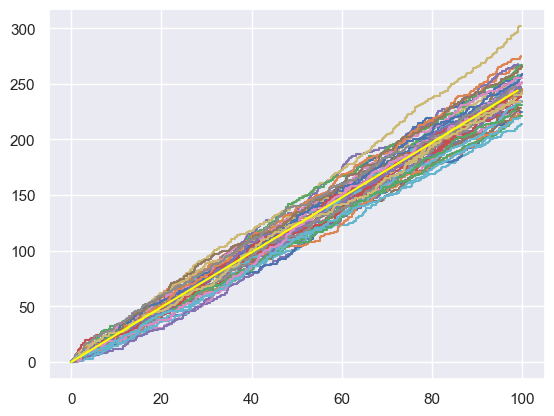

In [60]:
poisson_x = moments_of_climb(data) 

for j in poisson_x:
    poisson_y = list(range(0,len(j)))
    plt.step(j,poisson_y)
    
x = np.arange(0,100)
#y = x*2.3 #średnia JPP to lambda*t
y = x*lam_p
sns.lineplot(x,y, color = "yellow")

In [61]:
#proces ryzyka
def risk(lam,T=100,c=50, u=50):
    t = 0
    times = []
    
    while sum(times)<T:
        t = scipy.stats.expon.rvs(scale = 0.4)
        times.append(t)
    times_zero = [0] + times
    x_axis = np.cumsum(times_zero) #momenty zajścia jakiegoś zdarzenia(takie jak momenty skoków jpp)
    
    N = len(times_zero)
    X_i = scipy.stats.expon.rvs(size=N, scale = 10) #wysokości spadków
    R_list = []
    k=0
    
    for i in x_axis:
        fall = sum(X_i[:k])
        R = u + c*i - fall
        R_list.append(R)
        k = k+1
   
    return(times_zero,R_list,x_axis)
   

<AxesSubplot:ylabel='Count'>

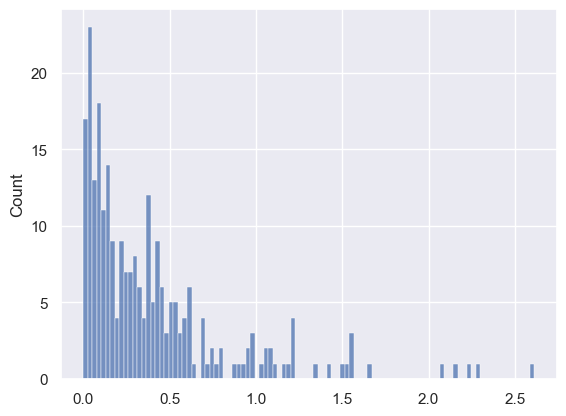

In [62]:
risk_process = risk(lam_p)
risk_process[2]
sns.histplot(risk_process[0], bins = 100)

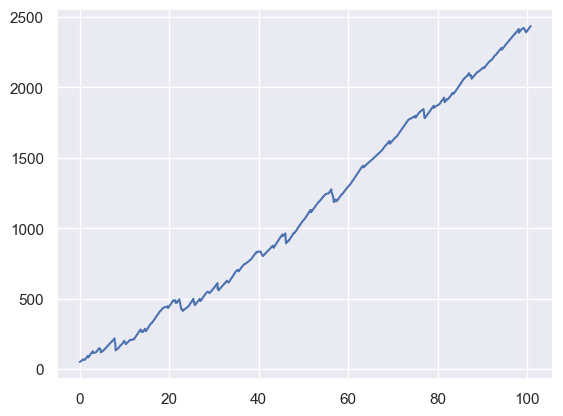

In [63]:
x_risk = risk_process[2]
y_risk = risk_process[1]
plt.plot(x_risk,y_risk)

In [64]:
#lista czasów, w których zachodzi jakaś zmiana w procesie ruiny. Tutaj zmiany zachodzą co 0.01[jc]
def traj_from_data(data): 
    times = [0.01 for i in range(10000)]
    times_zero = [0]+times
    moments = np.cumsum(times_zero)
    index = np.ceil(scipy.stats.uniform.rvs(0,49))
    steps = data[int(index)]
    return (moments,steps)

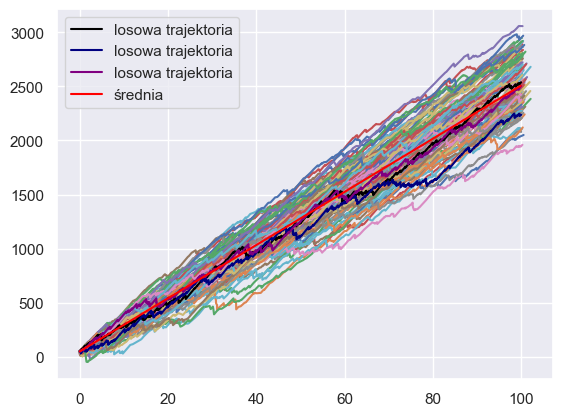

In [65]:
def my_and_data(data=data,T=100,lam_p = lam_p, EX_i = EX_i, c=50, u=50 ):
    #moja symulacja
    for i  in range(100):
        risk_process = risk(lam_p,T=T)
        x_risk = risk_process[2]
        y_risk = risk_process[1]
    #zliczanie, ile spadnie poniżej zera    
       
        plt.plot(x_risk,y_risk)



    #trajektorie prosto z pliku z danymi
    traj1=traj_from_data(data)
    traj2=traj_from_data(data)
    traj3=traj_from_data(data)
    plt.plot(traj1[0],traj1[1], color = "black",label = "losowa trajektoria")#błękitny
    plt.plot(traj2[0],traj2[1], color = "navy", label= "losowa trajektoria")#seledynowy
    plt.plot(traj3[0],traj3[1], color = "purple", label = "losowa trajektoria")#żółty

    #średnia wartość procesu

    x_range = np.arange(0,T,0.1)
    plt.plot(x_range, [u+c*x - lam_p*EX_i*x for x in x_range],color = "red", label = "średnia") # srednia
    plt.legend()
my_and_data()

0.02

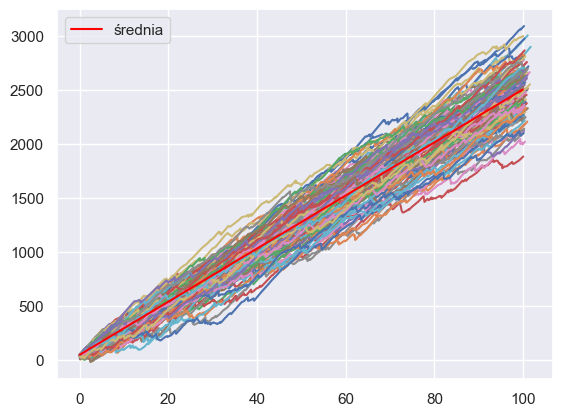

In [66]:
def my_simulation_probab_end(T=100,data=data,EX_i = EX_i, u=50, c=50, lam_p = lam_p):
    counter = 0

    #moja symulacja
    for i  in range(100):
        risk_process = risk(lam_p,T=T)
        x_risk = risk_process[2]
        y_risk = risk_process[1]
    #zliczanie, ile spadnie poniżej zera    
        ruin = [element < 0 for element in risk_process[1]]
        if True in ruin:
            counter +=1
        plt.plot(x_risk,y_risk)

    #średnia wartość procesu
    x_range = np.arange(0,T,0.1)
    plt.plot(x_range, [u+c*x - lam_p*EX_i*x for x in x_range],color = "red", label = "średnia") # srednia
    plt.legend()

    ruin_probability = counter/100
    return ruin_probability
    
my_simulation_probab_end(T=100)

In [67]:
def traj_from_data_all(data,i): 
    times = [0.01 for i in range(10000)]
    times_zero = [0]+times
    moments = np.cumsum(times_zero)
    steps = data[i]
    return (moments,steps)

In [68]:
def probab_end_data(data=data, T = 100, EX_i = EX_i, u=50, c=50, lam_p = lam_p):
    counter = 0
    for i in range(50):
        plot_data = traj_from_data_all(data,i)
        plt.plot(plot_data[0],plot_data[1])

        ruin = [element < 0 for element in plot_data[1]]
        if True in ruin:
            counter +=1
            
    x_range = np.arange(0,T,0.1)
    plt.plot(x_range, [u+c*x - lam_p*EX_i*x for x in x_range],color = "red", label = "średnia") # srednia
    plt.legend()
    
    return counter/50

0.04

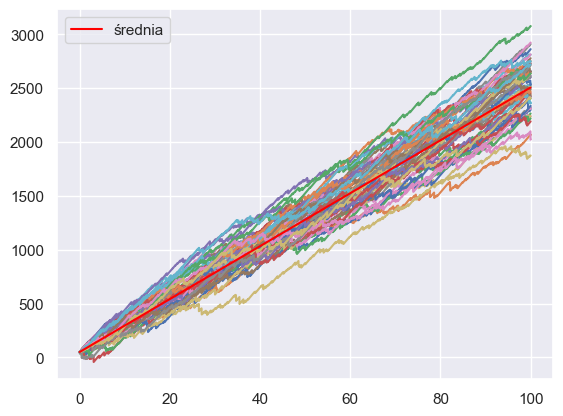

In [69]:
probab_end_data()

In [70]:
def Poiss_time(T, lambda_=lam_p): #Julka
    S_i = []
    t = 0
    while T > t:
        U = np.random.rand()
        S_i.append(t)
        t -= (1/lambda_)*np.log(U)
    return S_i

In [71]:
def prawd_ruiny(lam=lam_p, mu=EX_i, theta=theta, u=50, T=100):#Julka
    n = 0
    c = (1+theta)*EX_i*(lam)
    for _ in range(1000):
        p = Poiss_time(T,lam)
        R = np.ndarray(len(p))
        x = scipy.stats.expon.rvs(scale = EX_i, size=len(p))
        for index, i in enumerate(p):
            R[int(index)] = u + c * i - np.sum(x[:index])
            if R[index] < 0:
                n += 1
                break
    return(n/1000)

In [72]:
p = [prawd_ruiny() for i in range(5)]
p

[0.044, 0.054, 0.056, 0.05, 0.033]

In [73]:
def ruin_infinity(N, u=50):
    Z = np.zeros(N)
    
    for i in range(N):
        K = scipy.stats.geom(p=theta/(1+theta), loc = -1).rvs()
        Y = scipy.stats.expon(scale=10.3).rvs(size=K)
        
        if sum(Y) > u:
            Z[i] = 1
            
    return sum(Z)/N

ruin_infinity(100)     

0.04

Text(0, 0.5, 'prawdopodobieństwo ruiny dla nieskończonego horyzontu czasowego')

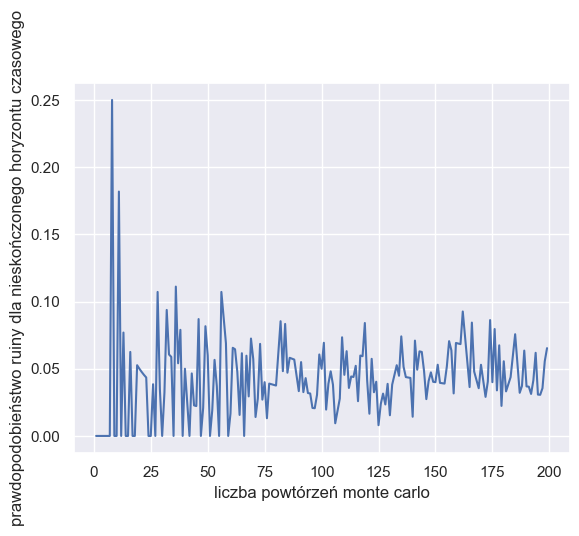

In [74]:
N=np.arange(1,200)
plt.plot(N, [ruin_infinity(i) for i in N])
plt.xlabel("liczba powtórzeń monte carlo")
plt.ylabel("prawdopodobieństwo ruiny dla nieskończonego horyzontu czasowego")

In [75]:
sum([min(data[i]) <0  for i in range(len(data)) ])/len(data)

0.04

In [76]:
counter = 0
for i in range(0, 49):
        for j in range(0, 10000):
            if data[i][j] < 0:
                counter+=1
                break
                
counter/50

0.04